# **Data Collection**

## Objectives

* Fetch data from yahoo finance and save as raw data
* Inspect the data and save it under outputs/datasets/collection

## Inputs

* Write here which data or information you need to run the notebook 

## Outputs

* Generate Dataset: outputs/datasets/collection/phnx_2010_2025.csv

## Additional Comments

* Converted all the feature names to lowercase for ease of use 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\ajv10\\Documents\\vscode-projects\\PP5'

---

## Fetch Data 

Install yahoo finance

In [4]:
%pip install yfinance==0.2.56

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import yahoo finance and download 'Phoenix Group Holdings plc' dataset from 2010 to 2025

In [5]:
import yfinance as yf
ticker = yf.Ticker("PHNX.L")

data = ticker.history(start="2010-01-01", end="2025-01-01")
print("dataset downloaded")

dataset downloaded


Create input directory for datasets

In [6]:
dir = "inputs/datasets/raw"

try:
  os.makedirs(name=dir)
  print(f"directory {dir} created")
except Exception as e:
  print(e)

directory inputs/datasets/raw created


Save csv file to input directory

In [7]:
data.to_csv(f"{current_dir}/{dir}/phnx_2010_2025.csv")
print("csv file saved")

csv file saved


---

## Load and Inspect Yahoo Data

Import pandas and upload csv file from inputs dataset to a dataframe

In [8]:
import pandas as pd
df = pd.read_csv(f"{dir}/phnx_2010_2025.csv")
print(df.shape)
df

(3788, 8)


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-01-04 00:00:00+00:00,477.996320,504.136205,477.996320,497.990021,13401,0.0,0.0
1,2010-01-05 00:00:00+00:00,507.246289,510.282389,507.246289,497.990021,10729,0.0,0.0
2,2010-01-06 00:00:00+00:00,497.990021,497.990021,497.990021,497.990021,0,0.0,0.0
3,2010-01-07 00:00:00+00:00,507.468427,507.468427,503.543762,503.543762,6169,0.0,0.0
4,2010-01-08 00:00:00+00:00,503.543762,503.543762,503.543762,503.543762,0,0.0,0.0
...,...,...,...,...,...,...,...,...
3783,2024-12-23 00:00:00+00:00,498.162306,502.260357,496.762980,501.260834,1071229,0.0,0.0
3784,2024-12-24 00:00:00+00:00,502.260351,505.258920,501.760590,501.760590,436491,0.0,0.0
3785,2024-12-27 00:00:00+00:00,500.261324,503.759655,500.261324,502.760132,881757,0.0,0.0
3786,2024-12-30 00:00:00+00:00,501.760601,504.759170,498.961948,500.761078,608408,0.0,0.0


Convert all feature names to lowercase to improve workflow consistency

In [9]:
df.columns = df.columns.str.lower()
df.head(3)

,date,open,high,low,close,volume,dividends,stock splits
0,2010-01-04 00:00:00+00:00,477.996320,504.136205,477.996320,497.990021,13401,0.0,0.0
1,2010-01-05 00:00:00+00:00,507.246289,510.282389,507.246289,497.990021,10729,0.0,0.0
2,2010-01-06 00:00:00+00:00,497.990021,497.990021,497.990021,497.990021,0,0.0,0.0


Check for missing and duplicated data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3788 entries, 0 to 3787
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          3788 non-null   object 
 1   open          3788 non-null   float64
 2   high          3788 non-null   float64
 3   low           3788 non-null   float64
 4   close         3788 non-null   float64
 5   volume        3788 non-null   int64  
 6   dividends     3788 non-null   float64
 7   stock splits  3788 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 236.9+ KB


In [11]:
df.isna().sum()

date            0
open            0
high            0
low             0
close           0
volume          0
dividends       0
stock splits    0
dtype: int64

In [12]:
df[df.duplicated(subset=['date'])]

,date,open,high,low,close,volume,dividends,stock splits


Check for unique values

In [13]:
df['dividends'].unique()

array([ 0.      , 15.657701, 15.0842  , 20.4201  , 22.5713  , 23.4     ,
       24.1     , 24.8     , 26.      , 26.65    ])

In [14]:
df['stock splits'].unique()

array([0.])

Plot data in a line chart for visualization

<Axes: xlabel='date'>

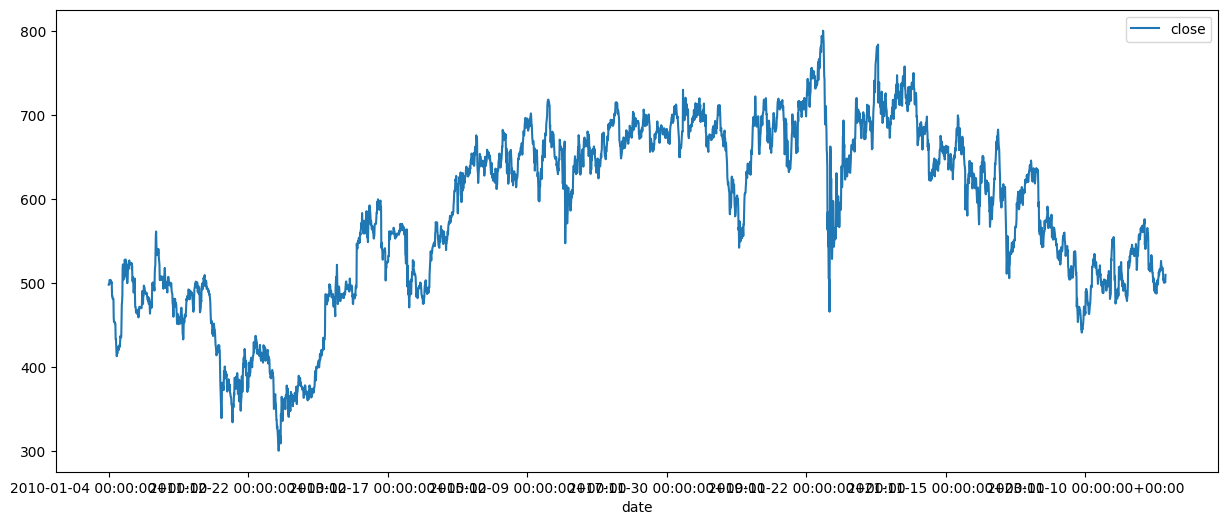

In [15]:
import matplotlib.pyplot as plt
df.plot.line(y='close',x='date',figsize=(15, 6))

---

## Save Files and Push to Repo

Create output directory and save modified csv file

In [16]:
dir = "outputs/datasets/collection"
try:
  os.makedirs(name=dir)
  print(f"directory {dir} created")
except Exception as e:
  print(e)

directory outputs/datasets/collection created


In [17]:
df.to_csv(f"{current_dir}/{dir}/phnx_2010_2025.csv",index=False)
print("csv file saved")

csv file saved
